Algoritmos


In [16]:
def lomuto_partition(items: list[int], left: int, right: int):
    pivot = items[right]
    i = left - 1

    for j in range(left, right):
        if items[j] <= pivot:
            i += 1
            items[i], items[j] = items[j], items[i]
    right_place = i + 1
    items[right_place], items[right] = items[right], items[right_place]
    return right_place


def haore_partition(items: list[int], start: int, pivot_index: int):

    pivot = items[pivot_index]
    right = pivot_index - 1
    left = start

    while left <= right:
        while left <= right and items[left] < pivot:
            left += 1
        while left <= right and items[right] > pivot:
            right -= 1
        if left <= right:
            items[left], items[right] = items[right], items[left]
            left += 1
            right -= 1
    items[left], items[pivot_index] = items[pivot_index], items[left]
    return left  # return the new pivot index


def merge(a: list[int], b: list[int]) -> list[int]:
    max_len = len(a) + len(b)
    merged = []
    i, j = 0, 0

    while len(merged) < max_len:

        if i >= len(a):
            merged.append(b[j])
            j += 1
        elif j >= len(b):
            merged.append(a[i])
            i += 1
        else:
            if a[i] <= b[j]:
                merged.append(a[i])
                i += 1
            elif b[j] <= a[i]:
                merged.append(b[j])
                j += 1
    return merged


def merge_sort(arr):
    arr_len = len(arr)
    if arr_len != 1:
        size = arr_len // 2
        start = arr[:size]
        end = arr[size:]
        return merge(merge_sort(start), merge_sort(end))
    return arr


def quick_sort(arr):
    return arr


def quick_sort_lomuto_recursive(items: list[int], left: int, right: int):

    if left < right:
        split_index = lomuto_partition(items, left, right)

        quick_sort_lomuto_recursive(items, left, split_index - 1)
        quick_sort_lomuto_recursive(items, split_index + 1, right)

    return items


def quick_sort_haore_recursive(items: list[int], start: int, pivot_index: int):

    if start < pivot_index:
        split_index = haore_partition(items, start, pivot_index)

        quick_sort_haore_recursive(items, start, split_index - 1)
        quick_sort_haore_recursive(items, split_index + 1, pivot_index)
    return items


def quick_sort_haore(items: list[int]):
    return quick_sort_haore_recursive(items, 0, len(items) - 1)


def quick_sort_lomuto(items: list[int]):
    return quick_sort_lomuto_recursive(items, 0, len(items) - 1)

Coleta dados


In [17]:
import time
from numpy import random


# scope of the randomness
DOMAIN = 9999999

# defines the number of times each algorithm will be processed to find the average time
num_rounds = 500

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=False):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        # create a list with random numbers
        dataList = list(random.randint(DOMAIN, size=size))
        L = dataList.copy()
        start = time.time()
        L = func(L)
        end = time.time()
        t += end - start

        if debug:
            assert L == sorted(L), "Non sorted"

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [merge_sort, quick_sort_haore, quick_sort_lomuto]

# sizes
sizes = [i for i in range(1000, 10001, 1000)]

mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 2
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 3
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 4
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 5
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 6
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 7
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 8
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 9
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Starting collect 10
  >  merge_sort
  >  quick_sort_haore
  >  quick_sort_lomuto

Finish data collection


Formata dados


In [18]:
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
merge_sort##1000,0.001481,merge_sort,1000
quick_sort_haore##1000,0.000738,quick_sort_haore,1000
quick_sort_lomuto##1000,0.000788,quick_sort_lomuto,1000
merge_sort##2000,0.003086,merge_sort,2000
quick_sort_haore##2000,0.001662,quick_sort_haore,2000
quick_sort_lomuto##2000,0.001784,quick_sort_lomuto,2000
merge_sort##3000,0.005028,merge_sort,3000
quick_sort_haore##3000,0.002654,quick_sort_haore,3000
quick_sort_lomuto##3000,0.002870,quick_sort_lomuto,3000
merge_sort##4000,0.006758,merge_sort,4000


Gráfico


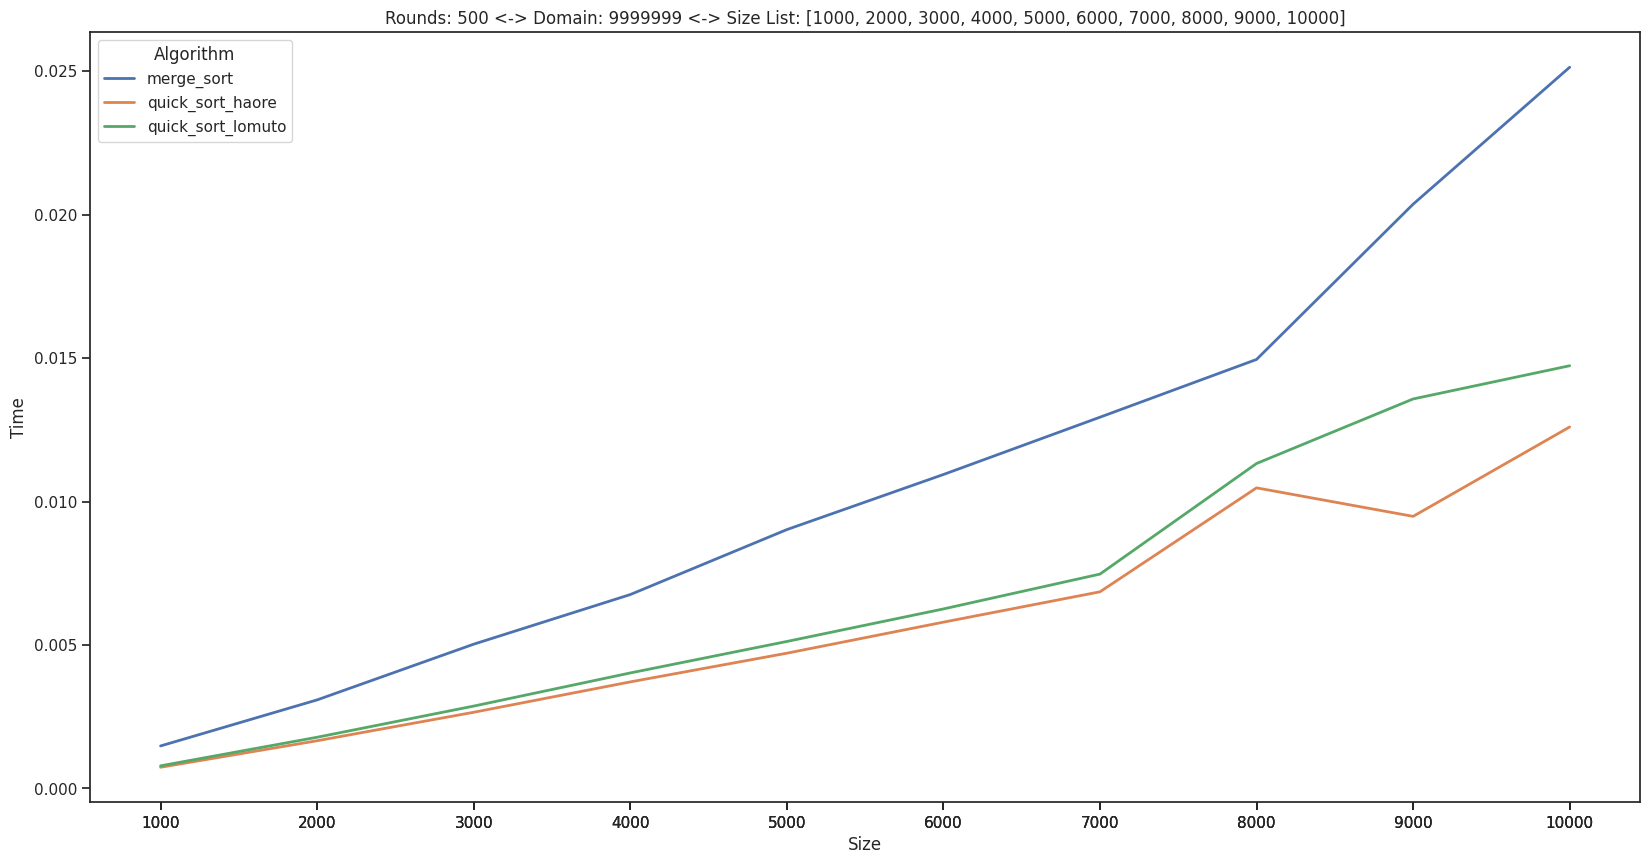

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defines font size and line width
sns.set_theme(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

fig = plt.figure()
chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)
chart.set_title(f"Rounds: {num_rounds} <-> Domain: {DOMAIN} <-> Size List: {sizes}")

chart.set(xticks=[i for i in df.Size])
plt.savefig("results.png", bbox_inches="tight")